In [2]:
import pandas as pd
import numpy as np
import os
import encoders
import models
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# Dataset
categories = ['Democrat', 'Republican']
tweetsdf = pd.read_csv('democratvsrepublicantweets/ExtractedTweets.csv')
handlesdf = pd.read_csv('democratvsrepublicantweets/TwitterHandles.csv')
raw_tweets = tweetsdf['Tweet']
normalized_tweets = raw_tweets.str.upper()
char_to_int, int_to_char = encoders.create_encoder_decoder(normalized_tweets.str.cat())
parties = tweetsdf['Party']
y = 1.0 - np.asarray(parties == 'Democrat')
max_tweet_len = normalized_tweets.str.len().max()
X = encoders.encode_strings(normalized_tweets, char_to_int, max_tweet_len)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from keras.layers import Input, Dense, Embedding, Flatten, Dropout, LSTM
from keras.models import Model
from keras.optimizers import Adam

# https://machinelearningmastery.com/stacked-long-short-term-memory-networks/
def model9(vocabulary_size, input_length):
    input_layer = Input(shape=(input_length,))
    x = Embedding(input_dim=vocabulary_size, input_length=input_length, output_dim=64)(input_layer)
    x = LSTM(64, return_sequences=True)(x)
    x = LSTM(64)(x)
    x = Dense(2, activation='softmax')(x)
    model = Model(input_layer, x)
    optimizer = Adam(lr=0.0003)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return 'model9-weights.hdf5', model

In [15]:
filepath, model = model9(len(char_to_int) + 1, max_tweet_len)
# if filepath in os.listdir():
#     model.load_weights(filepath)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 166)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 166, 64)           33664     
_________________________________________________________________
lstm_7 (LSTM)                (None, 166, 64)           33024     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 99,842
Trainable params: 99,842
Non-trainable params: 0
_________________________________________________________________


In [16]:
models.train(X_train, y_train, model, filepath)

Epoch 1/100
69168/69168 [==============================] - 90s 1ms/step - loss: 0.6928

Epoch 00001: loss improved from inf to 0.69277, saving model to model9-weights.hdf5
Epoch 2/100
69168/69168 [==============================] - 89s 1ms/step - loss: 0.6910

Epoch 00002: loss improved from 0.69277 to 0.69096, saving model to model9-weights.hdf5
Epoch 3/100
69168/69168 [==============================] - 93s 1ms/step - loss: 0.6897

Epoch 00003: loss improved from 0.69096 to 0.68973, saving model to model9-weights.hdf5
Epoch 4/100
69168/69168 [==============================] - 97s 1ms/step - loss: 0.6896

Epoch 00004: loss improved from 0.68973 to 0.68962, saving model to model9-weights.hdf5
Epoch 5/100
69168/69168 [==============================] - 89s 1ms/step - loss: 0.6896

Epoch 00005: loss improved from 0.68962 to 0.68959, saving model to model9-weights.hdf5
Epoch 6/100
69168/69168 [==============================] - 97s 1ms/step - loss: 0.6873

Epoch 00006: loss improved from 0.68

69168/69168 [==============================] - 93s 1ms/step - loss: 0.6383

Epoch 00049: loss did not improve from 0.63765
Epoch 50/100
69168/69168 [==============================] - 95s 1ms/step - loss: 0.6356

Epoch 00050: loss improved from 0.63765 to 0.63563, saving model to model9-weights.hdf5
Epoch 51/100
69168/69168 [==============================] - 96s 1ms/step - loss: 0.6332

Epoch 00051: loss improved from 0.63563 to 0.63316, saving model to model9-weights.hdf5
Epoch 52/100
69168/69168 [==============================] - 97s 1ms/step - loss: 0.6307

Epoch 00052: loss improved from 0.63316 to 0.63067, saving model to model9-weights.hdf5
Epoch 53/100
69168/69168 [==============================] - 101s 1ms/step - loss: 0.6309

Epoch 00053: loss did not improve from 0.63067
Epoch 54/100
69168/69168 [==============================] - 103s 1ms/step - loss: 0.6278

Epoch 00054: loss improved from 0.63067 to 0.62780, saving model to model9-weights.hdf5
Epoch 55/100
69168/69168 [=====

69168/69168 [==============================] - 94s 1ms/step - loss: 0.5888

Epoch 00099: loss improved from 0.59011 to 0.58883, saving model to model9-weights.hdf5
Epoch 100/100
69168/69168 [==============================] - 93s 1ms/step - loss: 0.5912

Epoch 00100: loss did not improve from 0.58883


In [17]:
predictions = np.argmax(model.predict(X_test), axis=1)

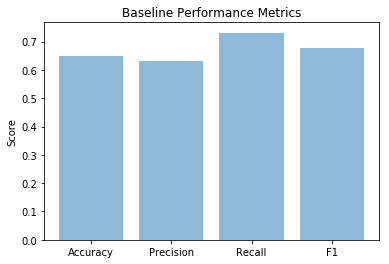

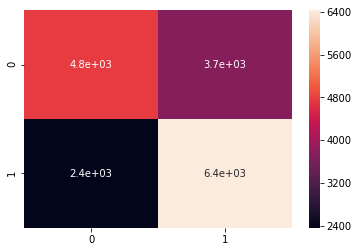

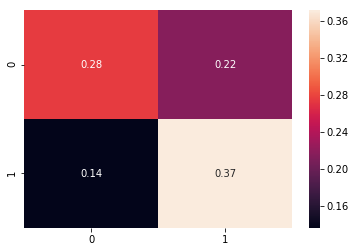

In [18]:
(accuracy, precision, recall, f1), confusion_matrix = models.plot_results(y_test, predictions)